<a href="https://colab.research.google.com/github/jogabenn/Actividades-MNA-Inteligencia-Artificial-y-Aprendizaje-Automatico/blob/main/Actividades%20Semana%207/Actividad_de_semana_7_Data_Analysis_with_Python_Modulo_4_Jonathan_Garza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Maestría en Inteligencia Artificial Aplicada (MNA)

Ciencia y Analítica de Datos

**Actividad de Semana 7: Data Analysis with Python Módulo 4**

**Jonathan Garza Bennet - A01793038**

**Importar Librerías Requeridas**

In [77]:
#Se importan todas las librerías requeridad para los ejercicios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

**Se descarga y crea la base de datos**

In [2]:
#Establecer la url de donde se descargará el archivo csv para los ejercicios
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

#Descargar el archivo, asignarlo a un dataframe y asignar el nombre deseado de las columnas.
df = pd.read_csv(path)

#Visualizar el encabezado del archivo
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**Regresión Lineal Simple y Múltiple**

<p>Un ejemplo de un modelo de datos que usaremos es:</p>
<b>Regresión Lineal Simple</b>

<br>
<p>La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:</p>
<ul>
    <li>El predictor/variable independiente (X)</li>
    <li>La respuesta/variable dependiente (que queremos predecir)(Y)</li>
</ul>

<p>El resultado de la regresión lineal es una <b> función lineal</b> that predicts the response (dependent) que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).</p>


$$
Y: Respuesta \ (Variable)\\\\\\\\\\
X: Predictor \ (Variables)
$$

<b>Función Lineal</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a se refiere a la <b>intersección</b> de la línea de regresión, en otras palabras: el valor de Y cuando X es 0</li>
    <li>b se refiere a la <b>pendiente </b> de la línea de regresión, en otras palabras: el valor con el que cambia Y cuando X aumenta en 1 unidad</li>
</ul>

In [20]:
#Se llama a la función de regresión lineal y se asigna a la variable lm
lm = LinearRegression()
lm

#Se utiliza highway-mpg como primer intento de predictor del precio y se asignan a las variables correspondientes
X = df[['highway-mpg']]
Y = df['price']

#Se entrena al modelo de regresión lineal con las variables seleccionadas
lm.fit(X,Y)

#Se predice el precio de los primeros 5 elementos del predictor
Yhat=lm.predict(X)

print('Los primeros 5 elementos de la predicción son:\n{}'.format(Yhat[0:5])+'\n')

#Se imprimen los pesos de la regresión:
print('El coeficiente a de lm es: {}'.format(lm.intercept_)+'\n')
print('El coeficiente b de lm es: {}'.format(lm.coef_)+'\n')

#Se crea un objeto nuevo de regresión lineal
lm1 = LinearRegression()

#Se utiliza highway-mpg como primer intento de predictor del precio y se asignan a las variables correspondientes
X1 = df[['engine-size']]
Y = df['price']

#Se entrena al modelo de regresión lineal con las variables seleccionadas
lm1.fit(X1,Y)

#Se imprimen los pesos de la regresión:
print('El coeficiente a de lm1 es: {}'.format(lm1.intercept_)+'\n')
print('El coeficiente b de lm1 es: {}'.format(lm1.coef_)+'\n')

#Se pueden obtener los mismos resultados si se utiliza la ecuación de la recta:
Price=lm1.intercept_ + lm1.coef_*X1.values

#Se imprimen los primeros 5 valore obtenidos por medio de predict y la ecuación Price
print('Los primeros 5 elementos de lm1 por medio del método predict son:\n{}'.format(lm1.predict(X1)[0:5])+'\n')
print('Los primeros 5 elementos de la ecuación Price son:\n{}'.format(Price[0:5])+'\n')

Los primeros 5 elementos de la predicción son:
[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]

El coeficiente a de lm es: 38423.3058581574

El coeficiente b de lm es: [-821.73337832]

El coeficiente a de lm1 es: -7963.338906281042

El coeficiente b de lm1 es: [166.86001569]

Los primeros 5 elementos de lm1 por medio del método predict son:
[13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775]

Los primeros 5 elementos de la ecuación Price son:
[[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]
 [14729.62322775]]



<h4><b>Regresión Lineal Múltiple</b></h4>

Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar la <b>regresión lineal múltiple</b>. La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y <b>dos o más</b> variables predictoras (independientes). La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero:

$$
Y: Respuesta \ (Variable)\\\\\\\\\\
X\_1 :Predictor\ (Variable \ 1)\\\\
X\_2: Predictor\ (Variable \ 2)\\\\
X\_3: Predictor\ (Variable \ 3)\\\\
X\_4: Predictor\ (Variable \ 4)\\\\
$$

$$
a: variable \ independiente\\\\\\\\\\
b\_1 :coeficientes \ de \ la\ Variable \ 1\\\\
b\_2: coeficientes \ de \ la\ Variable \ 2\\\\
b\_3: coeficientes \ de \ la\ Variable \ 3\\\\
b\_4: coeficientes \ de \ la\ Variable \ 4\\\\
$$

La ecuación resultante es:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

In [23]:
#Se crea la variable con los elementos predictores Z
Z3 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#Se entrena de nuevo el modelo lm con las nuevas variables predictoras
lm3 = LinearRegression()
lm3.fit(Z3, Y)

#Se imprimen los pesos de la regresión
print('La variable independiente de lm3 es: {}'.format(lm3.intercept_)+'\n')
print('Los coeficientes de lm3 son: {}'.format(lm3.coef_)+'\n')

#Se crea un nuevo modelo usando otras variables predictoras
lm4 = LinearRegression()

Z4 = df[['normalized-losses' , 'highway-mpg']]

lm4.fit(Z4, Y)

#Se imprimen los pesos de la nueva regresión
print('La variable independiente de lm4 es: {}'.format(lm4.intercept_)+'\n')
print('Los coeficientes de lm4 son: {}'.format(lm4.coef_)+'\n')


La variable independiente de lm3 es: -15806.62462632922

Los coeficientes de lm3 son: [53.49574423  4.70770099 81.53026382 36.05748882]

La variable independiente de lm4 es: 38201.31327245728

Los coeficientes de lm4 son: [   1.49789586 -820.45434016]



**Evaluación de Modelos Usando Visualización**

**Gráfica de regresión lineal**

Este gráfico mostrará una combinación de puntos de datos dispersos (un **gráfico de dispersión**), así como la **línea** resultante de la regresión lineal ajustada que pasa por los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

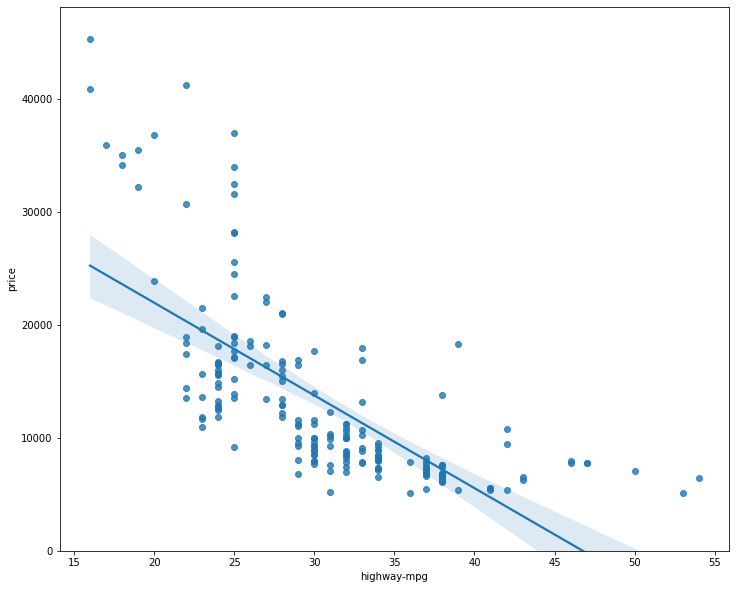

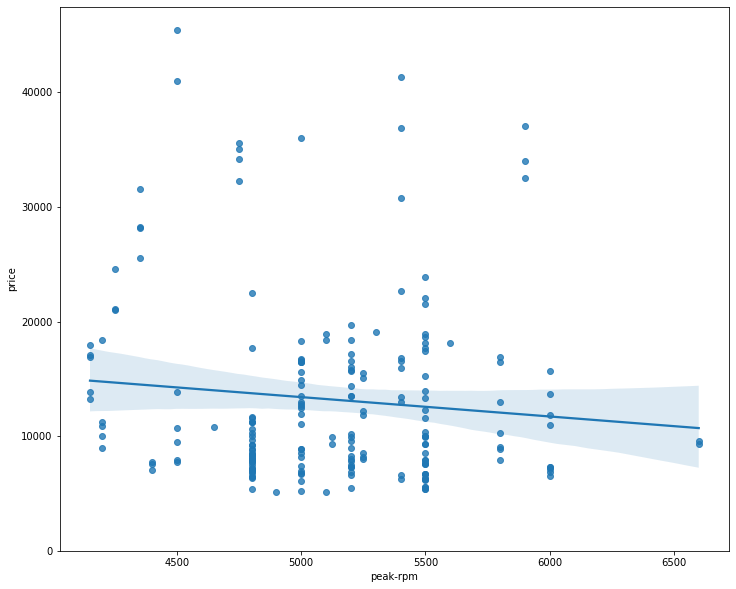

In [28]:
#Se visualiza highway-mpg como posible predictor de price

#Ancho de gráfica
width = 12

#Altura de gráfica
height = 10

#Se configura gráfica de regresión lineal
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

#Se despliega gráfica
plt.show()

#Se visualiza peak-rpm como posible predictor de price

#Ancho de gráfica
width = 12

#Altura de gráfica
height = 10

#Se configura gráfica de regresión lineal
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

#Se despliega gráfica
plt.show()

**Gráfica de Residuos**

Un residuo es la diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se llama residual (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

Si los puntos en una gráfica de residuos se **distribuyen aleatoriamente alrededor del eje x**, entonces **un modelo lineal es apropiado** para los datos.

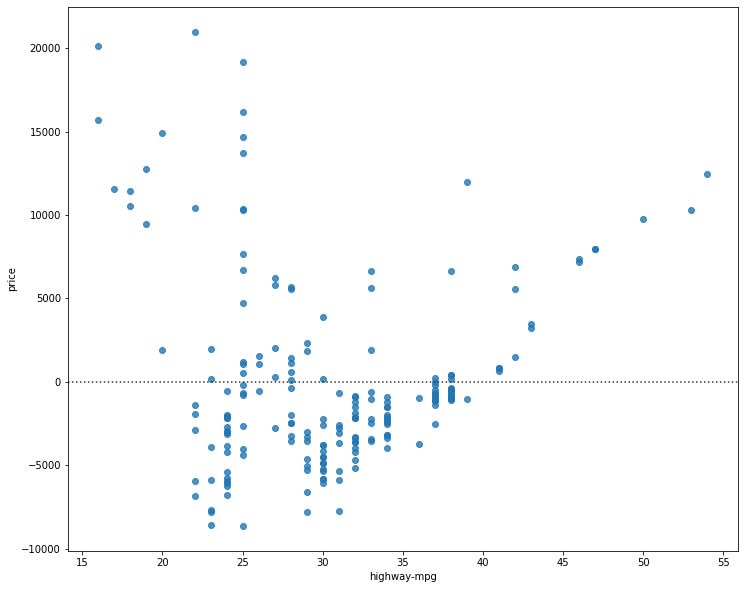

In [29]:
#Ancho de gráfica
width = 12

#Altura de gráfica
height = 10

#Se configura gráfica de residuos
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Los residuos de la gráfica anterior no se encuentran distribuidos aleatorimente alredor del eje X

Para la Regresión Lineal Múltiple se vuelve un poco más complejo y las gráficas anteriores no se pueden usar. En su lugar, se utilizan la gráficas de dispersión.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


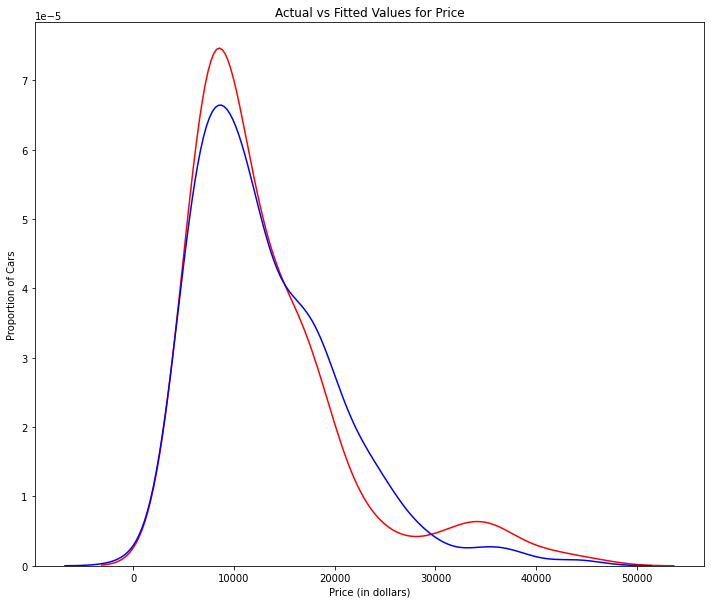

In [30]:
#Se utiliza el modelo RLM anterior para predecir el conjunto Z3
Y_hat = lm3.predict(Z3)

#Se reutilizan las dimensiones anteriores
plt.figure(figsize=(width, height))

#Se configura la gráfica de dispersión con respecto a la variable de interés
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

#Se configuran las etiquetas
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

#Se despliega la gráfica
plt.show()
plt.close()

Podemos ver que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay algo de espacio para mejorar.

**Regresión Polinomial y Pipelines**


La **regresión polinomial** es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

Hay diferentes órdenes de regresión polinomial:

<center><b>Cuadrático o de segundo orden</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cúbico o de tercer orden</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>De orden superior</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$



In [31]:
#Se define función para gráficar regresiones polinomiales
def PlotPolly(model, independent_variable, dependent_variabble, Name):

    #Se crea una lista de valores entre 15 y 55 como X
    x_new = np.linspace(15, 55, 100)

    #Se hace ajuste con el modelo seleccionado
    y_new = model(x_new)

    #Se realiza gráfica
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

En los ejercicios anteriores, se observó que no se tuvo el mejor desempeño con un modelo lineal para la relación entre 'highway-mpg' y 'price'. Se estudiará el desempeño usando una regresión polinomial.

La ecuación resultante es:

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05



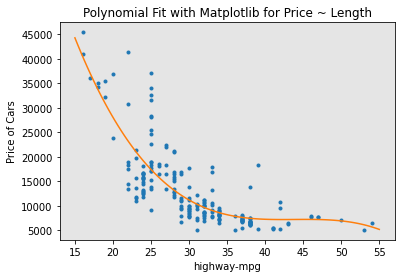

In [35]:
# Se asignan las variables a X y Y
x = df['highway-mpg']
y = df['price']

#Se utiliza un polinio de tercer orden
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print('La ecuación resultante es:\n\n{}'.format(p)+'\n')

#Se imprime la gráfica
PlotPolly(p, x, y, 'highway-mpg')

La gráfica resultante por medio del polinomo de tercer orden se ajusta mucho mejor a los datos.

La ecuación resultante es:

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08



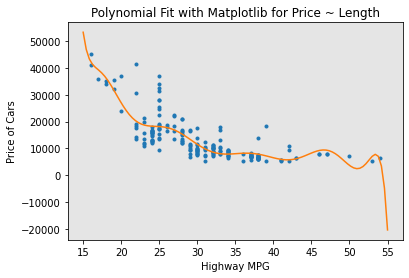

In [37]:
#Se realiza el mismo ejercicio anterior, pero con un polinomio de grado 11

#Se utiliza un polinio de grado 11
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print('La ecuación resultante es:\n\n{}'.format(p1)+'\n')

#Se imprime la gráfica
PlotPolly(p1,x,y, 'Highway MPG')

Entre mayor orden tiene el polinomio, más compleja es la solución resultante.

In [56]:
#Se crea un polinomio de grado 2 por medio de la librería Polynomial Features
pr=PolynomialFeatures(degree=2)

Z_pr=pr.fit_transform(Z3)

#Se imprime la forma de los datos originales
print('La forma de los datos originales Z3 es: {}'.format(Z3.shape)+'\n')

#Se imprime la forma de los datos transformados
print('La forma de los datos transformados Z3 es: {}'.format(Z_pr.shape)+'\n')

La forma de los datos originales Z3 es: (201, 4)

La forma de los datos transformados Z3 es: (201, 15)



**Pipelines**

Los Pipelines de datos simplifican los pasos para procesar los datos. Usamos el módulo Pipeline para crear un pipeline, también usamos StandardScaler como un paso dentro del mismo.

Creamos el pipeline creando una lista de tuples incluyendo el nombre del modelo o estimador y su constructor correspondiente.

In [65]:
#Se define la lista de tuples con los pasos a seguir
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#Se crea el pipeline con la lista de pasos
pipe=Pipeline(Input)

#Se re-define Z3 como tipo float
Z3 = Z3.astype(float)

#Se procede con todos los pasos dentro del pipeline
pipe.fit(Z3,y)

#Se realizan las predicciones con Z3
ypipe=pipe.predict(Z3)

#Se imprimen los primeros 4 resultados despues de segir los pasos del pipeline
print('Los primeros 4 resultados del ypipe son: {}'.format(ypipe[0:4])+'\n')

#Se crea un pipeline incluyendo un modelo de regresión lineal
Input1=[('scale',StandardScaler()),('model',LinearRegression())]

#Se crea el pipeline con la lista de pasos
pipe1=Pipeline(Input1)

#Se procede con todos los pasos dentro del pipeline
pipe1.fit(Z3,y)

#Se realizan las predicciones con Z3
ypipe1=pipe1.predict(Z3)

#Se imprimen los primeros 10 resultados despues de segir los pasos del pipeline
print('Los primeros 10 resultados del ypipe son: {}'.format(ypipe1[0:10])+'\n')

Los primeros 4 resultados del ypipe son: [13102.74784201 13102.74784201 18225.54572197 10390.29636555]

Los primeros 10 resultados del ypipe son: [13699.11161184 13699.11161184 19051.65470233 10620.36193015
 15521.31420211 13869.66673213 15456.16196732 15974.00907672
 17612.35917161 10722.32509097]



**Medidas para la Evaluación dentro de la Muestra**

<b>R-cuadrada</b>

<p>R al cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.</p>

<p>El valor de la R-cuadrada es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.</p>

<b>Error Cuadrático Medio (MSE)</b>

<p>El error cuadrático medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).</p>

In [72]:
#Se hace la regresión lineal de highway_mpg
lm.fit(X, Y)

# Se calcula R^2
print('El valor de R-cuadrada es: {}'.format(lm.score(X, Y))+'\n')

#Se realizan las predicciones y se imprimen los primeros 4 valores
Yhat=lm.predict(X)
print('Los primeros 4 valores predecidos son:\n{}'.format(Yhat[0:4])+'\n')

#Se calcula el error cuadrático medio
mse = mean_squared_error(df['price'], Yhat)
print('El error cuadrático medio entre price y su predicción es: {}'.format(mse)+'\n')

El valor de R-cuadrada es: 0.4965911884339176

Los primeros 4 valores predecidos son:
[16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]

El error cuadrático medio entre price y su predicción es: 31635042.944639888



La correlación lineal del modelo no es muy alta, lo que puede indicar que no se tiene no existe una realación de este tipo entre las variables

**Modelo 2: Regresión Lineal Múltiple**



In [76]:
#Se ajusta el modelo 
lm.fit(Z3, y)
#Se calcula el error cuadrático medio
print('El error cuadrático medio entre price y su predicción es: {}'.format(lm.score(Z3, y)))

#Se calculan las predicciones con todas las variables usando multifit
Y_predict_multifit = lm.predict(Z3)

print('El error cuadrático medio entre price y los valores predichos usando multifit es: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

El error cuadrático medio entre price y su predicción es: 0.8093562806577457
El error cuadrático medio entre price y los valores predichos usando multifit es:  11980366.87072649


El 80.94% de la variación se explica por medio de esta regresión lineal múltiple

**Modelo 3: Ajuste Polinomial**

In [81]:
#Se calcula r cuadrada usando el módulo de Phyton
r_squared = r2_score(y, p(x))

#Se imprime el resultado
print('El valor de R cuadrada del modelo polinomial es: ', r_squared)

#Se imprime el error cuadrático medio
print('El error cuadrático medio entre price y los valores predichos usando el modelo polinomial es: ', \
      mean_squared_error(df['price'], p(x)))


El valor de R cuadrada del modelo polinomial es:  0.674194666390652
El error cuadrático medio entre price y los valores predichos usando el modelo polinomial es:  20474146.426361218


**Predicciones y Toma de Decisiones**

Los primeros 5 valores de las predicciones son:
[37601.57247984 36779.83910151 35958.10572319 35136.37234487
 34314.63896655]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


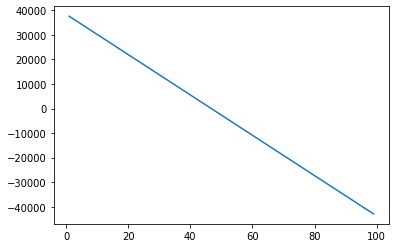

In [85]:
#Se crea una nueva entrada
new_input=np.arange(1, 100, 1).reshape(-1, 1)

#Se ajusta el model
lm.fit(X, Y)

#Se realizan las predicciones y se despliegan los primeros 5 valores
yhat=lm.predict(new_input)
print('Los primeros 5 valores de las predicciones son:\n{}'.format(yhat[0:5]))

#Se despliega la gráfica
plt.plot(new_input, yhat)
plt.show()

Ahora que hemos visualizado los diferentes modelos y generado los valores R-cuadrada y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?

¿Cuál es un buen valor de R-cuadrado?
Al comparar modelos, el modelo con **el valor R cuadrada más alto se ajusta mejor a los datos**.

¿Qué es una buena MSE?
Al comparar modelos, el modelo con el **valor MSE más pequeño se ajusta mejor a los datos**.